In [369]:
import pandas as pd,numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
data=pd.read_csv("/content/cleaned_dataset.csv")
data=data[['tempmax','tempmin','dew','humidity','precip','precipprob','sealevelpressure','conditions']]
data

,tempmax,tempmin,dew,humidity,precip,precipprob,sealevelpressure,conditions
0,23.0,16.0,15.1,79.3,0.000,0.0,1018.6,Clear
1,23.0,14.0,14.6,82.3,0.000,0.0,1017.3,cloudy
2,24.0,14.0,14.1,77.6,0.000,0.0,1015.9,Clear
3,23.0,13.0,13.4,78.0,0.000,0.0,1016.6,Clear
4,24.0,13.0,13.0,75.7,0.000,0.0,1015.8,Clear
...,...,...,...,...,...,...,...,...
390,26.0,16.0,18.2,83.5,0.000,0.0,1017.0,cloudy
391,26.0,17.8,17.3,79.9,0.000,0.0,1016.4,cloudy
392,25.0,18.0,17.2,81.4,0.000,0.0,1016.5,cloudy
393,23.0,17.0,17.4,88.3,0.988,100.0,1018.9,rainy


<Axes: >

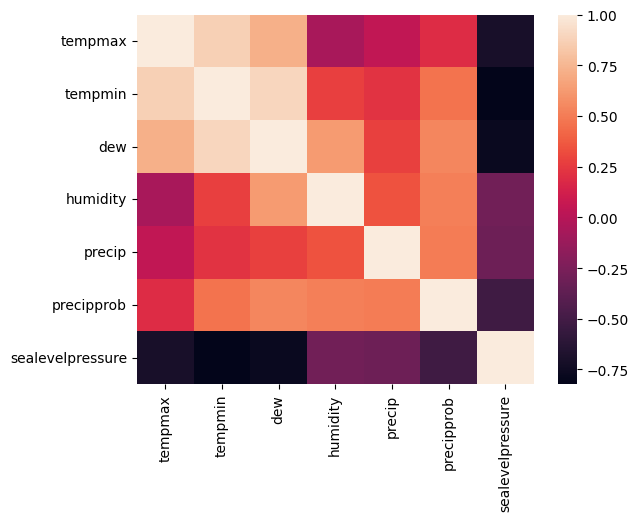

In [370]:
sns.heatmap(data.corr())

In [371]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
data['conditions']=encoder.fit_transform(data['conditions'])
data

,tempmax,tempmin,dew,humidity,precip,precipprob,sealevelpressure,conditions
0,23.0,16.0,15.1,79.3,0.000,0.0,1018.6,0
1,23.0,14.0,14.6,82.3,0.000,0.0,1017.3,1
2,24.0,14.0,14.1,77.6,0.000,0.0,1015.9,0
3,23.0,13.0,13.4,78.0,0.000,0.0,1016.6,0
4,24.0,13.0,13.0,75.7,0.000,0.0,1015.8,0
...,...,...,...,...,...,...,...,...
390,26.0,16.0,18.2,83.5,0.000,0.0,1017.0,1
391,26.0,17.8,17.3,79.9,0.000,0.0,1016.4,1
392,25.0,18.0,17.2,81.4,0.000,0.0,1016.5,1
393,23.0,17.0,17.4,88.3,0.988,100.0,1018.9,2


T_MAX Regression( .957 R2 Score via  Linear Reg .)

0 -> Clear,
1-> Cloudy,
2->Rainy.

In [345]:
y=data['tempmax']
x=data[['conditions','tempmin','dew','humidity','precipprob','sealevelpressure']]
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y,  test_size=0.10, random_state=101)# Or same in test_size=.25

In [346]:
from sklearn.linear_model import LinearRegression
linear_reg_T_model = LinearRegression().fit(x_train, y_train)
linear_reg_T_model.score(x_train,y_train)

0.9539244339471713

In [347]:
linear_reg_T_model.score(x_test,y_test)

0.9516529180962614

In [348]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree=3
polyreg_T=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg_T.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [351]:
polyreg_T.score(x_train,y_train)

0.9713169622002906

In [352]:
polyreg_T.score(x_test,y_test)

0.9573657838215714

Temp min Regression( .98 R2 score via 2nd degree polynomial Reg)

In [353]:
y=data['tempmin']
x=data[['conditions','tempmax','dew','humidity','precipprob','sealevelpressure']]
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y,  test_size=0.20, random_state=101)# Or same in test_size=.25

In [354]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree=2
polyreg_T_min=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg_T_min.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [355]:
polyreg_T_min.score(x_train,y_train)

0.9786687506340747

In [356]:
polyreg_T_min.score(x_test,y_test)

0.9810881426909069

Humidity Regression( 100% via both higher and lower degree regression.) 

In [357]:
y=data['humidity']
x=data[['conditions','tempmax','dew','humidity','precip','sealevelpressure']]
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y,  test_size=0.20, random_state=101)# Or same in test_size=.25

In [358]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree=1
polyreg_H=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg_H.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [359]:
polyreg_H.score(x_train,y_train)

1.0

In [360]:
polyreg_H.score(x_test,y_test)

1.0

Precipitation Probability ( .9998 R2 score via 2nd degree Poly Reg.)

In [379]:
y=data['precipprob']
x=data[['conditions','tempmin','dew','humidity','tempmax','sealevelpressure']]
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y,  test_size=0.20, random_state=101)# Or same in test_size=.25

In [380]:
max(y)-min(y)

100.0

In [381]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree=2
polyreg_Precip=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg_Precip.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [382]:
polyreg_Precip.score(x_train,y_train)

0.9998795482569941

In [383]:
polyreg_Precip.score(x_test,y_test)

0.9998613501589743